In [47]:
import pandas as pd
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import sklearn中 iris的資料集
dataset = datasets.load_iris()

In [48]:
#查看兩種屬性名稱
dataset.target_names, dataset.feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [49]:
#整理欄位以dataframe呈現
species = [dataset.target_names[x] for x in dataset.target ]
iris = pd.DataFrame(dataset.data,columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris['Species'] = species 
#將label 數字化
levels = {'setosa':0, 'versicolor':1, 'virginica':2}
iris['Species'] = [levels[x] for x in iris['Species']]
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [50]:
iris['Species'].value_counts()
iris.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
Sepal_Length,1.000000,-0.117570,0.871754,0.817941,0.782561
Sepal_Width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
Petal_Length,0.871754,-0.428440,1.000000,0.962865,0.949035
Petal_Width,0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


In [51]:
iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


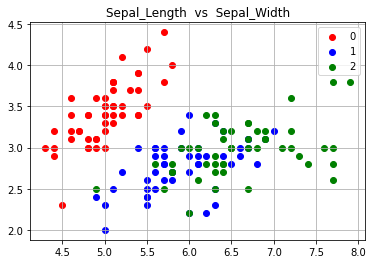

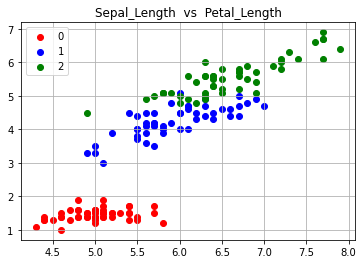

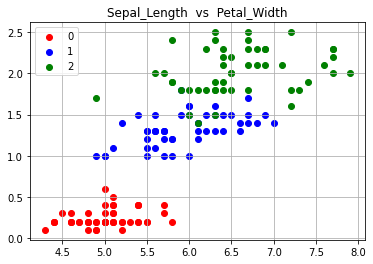

In [52]:
#用scatter 看data特徵分布,可大致看出是有分群狀態
color = ['red','blue','green']

def plot_scatter(col1,col2):
    y = 0
    plt.figure()
    plt.axes()
    for x  in iris['Species'].unique():
        plt.scatter(iris[iris['Species'] == x][col1],iris[iris['Species'] == x][col2] ,color = color[y],label = x)
        y+=1
        plt.title(col1+'  vs  '+col2)
    
    plt.grid()
    plt.legend()
    
# ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
plot_scatter('Sepal_Length','Sepal_Width')
plot_scatter('Sepal_Length','Petal_Length')
plot_scatter('Sepal_Length','Petal_Width')
plt.show()
plt.close()

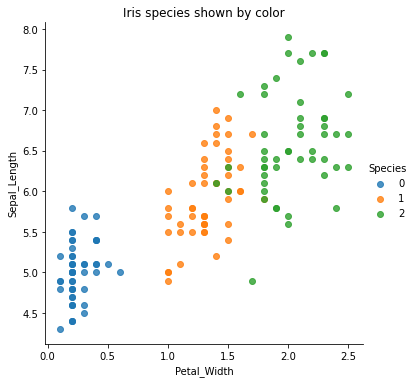

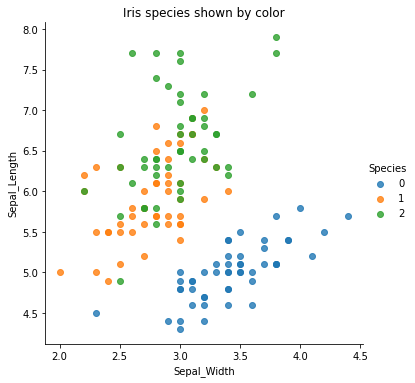

In [53]:
#可用seabon套件直接畫分布圖
def plot_iris(iris, col1, col2):

    sns.lmplot(x = col1, y = col2, 
               data = iris, 
               hue = "Species", 
               fit_reg = False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species shown by color')
    plt.show()
plot_iris(iris, 'Petal_Width', 'Sepal_Length')
plot_iris(iris, 'Sepal_Width', 'Sepal_Length')


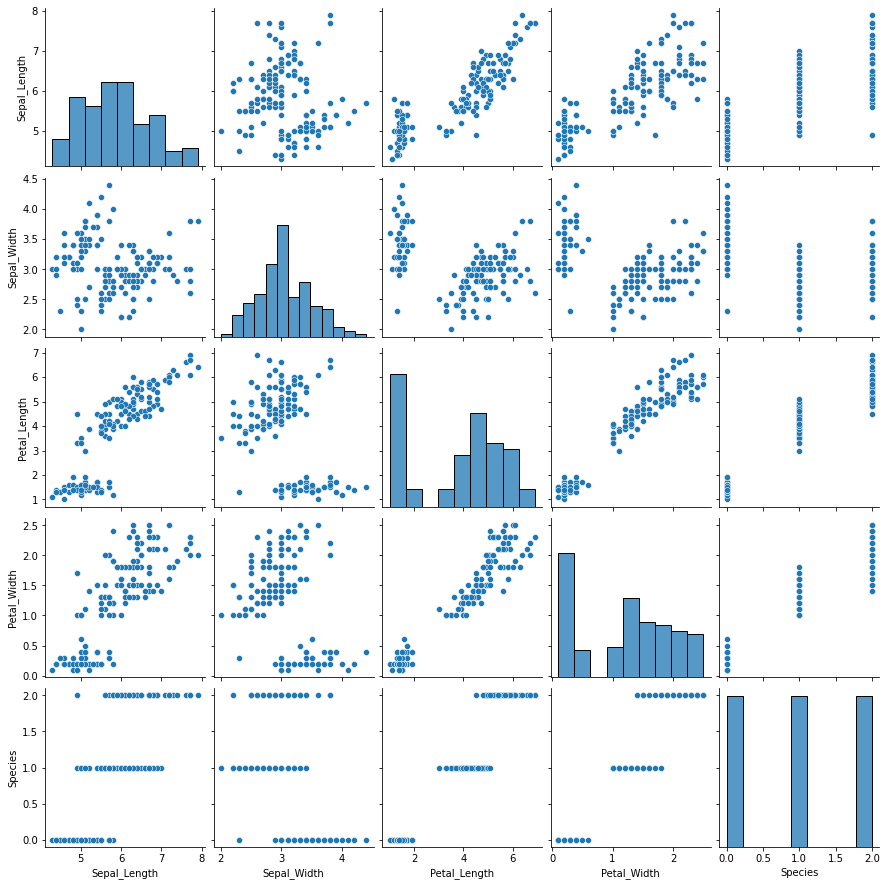

In [54]:
#pairplot可看出 近乎所有特徵分三類
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris)
plt.show()

In [55]:
#先進行資料拆解
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(3456)
y = iris['Species']
X = iris[[x for x in iris.columns][:-1]]

X_train ,X_test,y_train,y_test = train_test_split(X,y , test_size = 0.3,random_state=0)

In [56]:
#使用Standardization標準化數據,讓集距縮減
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
KNN_mod = KNeighborsClassifier(n_neighbors = 3)
KNN_mod.fit(X_train_std, y_train)
#---------原始求accuracy算法---------#
num_cols = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
predict_table = pd.DataFrame(X_test, columns = num_cols)#創dataframe給 驗證集
predict_table['predict'] = KNN_mod.predict(X_test_std)#增加預測資料
#預測成功=1欄位
predict_table ['predict_correct'] = [1 if x == z else 0 for x, z in zip(predict_table['predict'], y_test)]
accuracy = 100.0 * float(sum(predict_table ['predict_correct'])) / float(X_test.shape[0])
accuracy
#----------------------------------#
KNN_mod.score(X_test_std,y_test)


0.9777777777777777

In [57]:
#使用歸一化數據
from sklearn.preprocessing import Normalizer
normalize= Normalizer()
X_train_nor = normalize.fit_transform(X_train)
X_test_nor = normalize.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
KNN_mod = KNeighborsClassifier(n_neighbors = 3)
KNN_mod.fit(X_train_nor, y_train)

KNN_mod.score(X_test_nor,y_test)

0.9333333333333333

In [58]:
#特徵值的取值縮放到一個範圍（0,1）
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train_minmax = scale.fit_transform(X_train)
X_test_minmax = scale.transform(X_test)
# X_train_std
from sklearn.neighbors import KNeighborsClassifier
KNN_mod = KNeighborsClassifier(n_neighbors = 3)
KNN_mod.fit(X_train_minmax, y_train)

KNN_mod.score(X_test_minmax,y_test)

0.9777777777777777

In [59]:
from sklearn.preprocessing import MaxAbsScaler
scale = MaxAbsScaler()
X_train_maxabs = scale.fit_transform(X_train)
X_test_maxabs = scale.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
KNN_mod = KNeighborsClassifier(n_neighbors = 3)
KNN_mod.fit(X_train_maxabs, y_train)

KNN_mod.score(X_test_maxabs,y_test)

0.9777777777777777

# 可發現數據值偏小時,不處理資料集距是不會差太多


In [60]:
#不處理數據集距
KNN_mod = KNeighborsClassifier(n_neighbors = 3)
KNN_mod.fit(X_train, y_train)

KNN_mod.score(X_test,y_test)

0.9777777777777777

# 探討標準化數據
1.StandardScaler()


2.normalize()


3.MinMaxScaler()


4.MaxAbsScaler()

In [61]:
#StandardScaler計算訓練集的平均值和標準差，以便測試數據集使用相同的變換。
X_train_std[:3]

array([[-1.02366372, -2.37846268, -0.18295039, -0.29318114],
       [ 0.69517462, -0.10190314,  0.93066067,  0.7372463 ],
       [ 0.92435306,  0.58106472,  1.04202177,  1.63887031]])

In [62]:
'''
對每個樣本計算其p-範數，再對每個元素除以該範數，這使得每個處理後樣本的p-範數（l1-norm,l2-norm）等於1。
如果後續要使用二次型等方法計算兩個樣本之間的相似性會有用。 
preprocessing.Normalizer(norm=’l2’, copy=True)
Normalizer可以用在密集數,也可以用在稀疏矩陣
'''
X_train_nor[:3]

array([[0.76923077, 0.30769231, 0.53846154, 0.15384615],
       [0.70610474, 0.3258945 , 0.59747324, 0.1955367 ],
       [0.68914871, 0.33943145, 0.58629069, 0.25714504]])

In [63]:
# 將資料特徵縮放至某一範圍(scalingfeatures to a range),0-1之間
'''
使用這種標準化方法的原因是，有時資料集的標準差非常非常小，有時資料中有很多很多零（稀疏資料）
X_std = (X – X.min(axis=0)) / (X.max(axis=0) – X.min(axis=0)) ;

X_scaler = X_std/ (max – min) min
'''
X_train_minmax[:3]

array([[0.19444444, 0.        , 0.4137931 , 0.375     ],
       [0.61111111, 0.41666667, 0.75862069, 0.70833333],
       [0.66666667, 0.54166667, 0.79310345, 1.        ]])

In [64]:
'''
MaxAbsScaler（絕對值最大標準化）

與上述標準化方法相似，但是它通過除以最大值將訓練集縮放至[-1,1]。這意味著資料已經以０為中心或者是含有非常非常多０的稀疏資料。
'''
X_train_maxabs[:3]

array([[0.63291139, 0.45454545, 0.50724638, 0.4       ],
       [0.82278481, 0.68181818, 0.79710145, 0.72      ],
       [0.84810127, 0.75      , 0.82608696, 1.        ]])

In [65]:
X_train[:3]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5


# 
reference:https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/634563/